In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("./data/instacart/order_products__prior.csv")

In [3]:
#产品id，与过道的对应
products = pd.read_csv("./data/instacart/products.csv")

In [4]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("./data/instacart/orders.csv")

In [5]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [6]:
prior.head() #订单id，产品id，下面只需要掌握订单和产品的关联即可

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [7]:
products.head() #产品id，产品名称，过道id

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [8]:
orders.head()  #订单id，用户id

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [9]:
aisles.head() #过道id，对应过道里放了哪些产品类别

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [10]:
# 合并四张表到一张表  （用户-物品类别），在这里挂了，用下阿里云
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_ = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [11]:
mt.head(10)

order_id  product_id  add_to_cart_order  reordered  \
0         2       33120                  1          1   
1         2       28985                  2          1   
2         2        9327                  3          0   
3         2       45918                  4          1   
4         2       30035                  5          0   
5         2       17794                  6          1   
6         2       40141                  7          1   
7         2        1819                  8          1   
8         2       43668                  9          0   
9         3       33754                  1          1   

                                        product_name  aisle_id  department_id  \
0                                 Organic Egg Whites        86             16   
1                              Michigan Organic Kale        83              4   
2                                      Garlic Powder       104             13   
3                                     Coconut Butter        19             13   
4                                  Natural Sweetener        17             13   
5                                            Carrots        83              4   
6                   Original Unflavored Gelatine Mix       105             13   
7           All Natural No Stir Creamy Almond Butter        88             13   
8                            Classic Blend Cole Slaw       123              4   
9  Total 2% with Strawberry Lowfat Greek Strained...       120             16   

   user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   202279    prior             3          5                  9   
1   202279    prior             3          5                  9   
2   202279    prior             3          5                  9   
3   202279    prior             3          5                  9   
4   202279    prior             3          5                  9   
5   202279    prior             3          5                  9   
6   202279    prior             3          5                  9   
7   202279    prior             3          5                  9   
8   202279    prior             3          5                  9   
9   205970    prior            16          5                 17   

   days_since_prior_order                       aisle  
0                     8.0                        eggs  
1                     8.0            fresh vegetables  
2                     8.0           spices seasonings  
3                     8.0               oils vinegars  
4                     8.0          baking ingredients  
5                     8.0            fresh vegetables  
6                     8.0  doughs gelatins bake mixes  
7                     8.0                     spreads  
8                     8.0  packaged vegetables fruits  
9                    12.0                      yogurt

In [12]:
mt.shape

(32434489, 14)

In [13]:
mt.isnull().sum()/mt.shape[0]  #数据缺失率，没有缺失值

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [14]:
# pd.crosstab 是一个 Pandas 函数，用于生成交叉表，主要用于显示两个或更多变量的频数关系
# 交叉表的每一列表示一个分类变量的值，每一行表示另一个分类变量的值
# 在这个例子中，我们使用 'user_id' 和 'aisle' 来构建交叉表
# 'user_id' 表示每个用户的标识符，'aisle' 表示用户购物的过道类别（或其他分类信息）

cross = pd.crosstab(mt['user_id'], mt['aisle'])

# 打印交叉表，查看每个用户与每个过道之间的关系
# print(cross)


In [15]:
cross.head(10)

aisle    air fresheners candles  asian foods  baby accessories  \
user_id                                                          
1                             0            0                 0   
2                             0            3                 0   
3                             0            0                 0   
4                             0            0                 0   
5                             0            2                 0   
6                             0            0                 0   
7                             0            0                 0   
8                             0            1                 0   
9                             0            0                 0   
10                            0            1                 0   

aisle    baby bath body care  baby food formula  bakery desserts  \
user_id                                                            
1                          0                  0                0   
2                          0                  0                0   
3                          0                  0                0   
4                          0                  0                0   
5                          0                  0                0   
6                          0                  0                0   
7                          0                  0                0   
8                          0                  0                0   
9                          0                  6                0   
10                         0                  0                0   

aisle    baking ingredients  baking supplies decor  beauty  beers coolers  \
user_id                                                                     
1                         0                      0       0              0   
2                         2                      0       0              0   
3                         0                      0       0              0   
4                         0                      0       0              0   
5                         0                      0       0              0   
6                         0                      0       0              0   
7                         2                      0       0              0   
8                         1                      0       0              0   
9                         2                      0       0              0   
10                        0                      0       0              0   

aisle    ...  spreads  tea  tofu meat alternatives  tortillas flat bread  \
user_id  ...                                                               
1        ...        1    0                       0                     0   
2        ...        3    1                       1                     0   
3        ...        4    1                       0                     0   
4        ...        0    0                       0                     1   
5        ...        0    0                       0                     0   
6        ...        0    0                       0                     0   
7        ...        0    0                       0                     0   
8        ...        0    0                       0                     0   
9        ...        0    0                       0                     0   
10       ...        0    0                       0                     0   

aisle    trail mix snack mix  trash bags liners  vitamins supplements  \
user_id                                                                 
1                          0                  0                     0   
2                          0                  0                     0   
3                          0                  0                     0   
4                          0                  0                     0   
5                          0                  0                     0   
6                          0             

In [16]:
cross.shape

(206209, 134)

In [17]:
type(cross)

pandas.core.frame.DataFrame

In [18]:
# 进行主成分分析,那么大家还记得不？，保留90%的成分，实际特征数目减少了几倍，134--》27
pca = PCA(n_components=0.9)

In [19]:
data = pca.fit_transform(cross)  #还记得fit_transform的作用不？
data.shape

(206209, 27)

In [20]:
type(data)

numpy.ndarray

In [21]:
# 把样本数量减少,为了下面画图方便，这里只取500个样本
x = data[:500]
x.shape

(500, 27)

In [22]:
x[0:10]

array([[-2.42156587e+01, -2.42942720e+00, -2.46636975e+00,
         1.45686388e-01,  2.69042476e-01, -1.43293209e+00,
        -2.14067666e+00,  2.73803122e+00, -2.71431623e+00,
        -1.74313529e+00, -1.13632718e+00,  6.73601069e-01,
        -1.65070735e+00,  2.83802486e+00,  5.89384489e+00,
        -7.84312891e+00, -4.84010146e+00, -3.22598697e+00,
        -4.58007571e+00,  7.77403349e-01, -3.69912893e+00,
         1.90721439e+00, -2.99538594e+00, -7.72922878e-01,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00, -3.67511165e+01,  8.38255336e+00,
        -1.50975303e+01, -6.92093785e+00, -9.78375183e-01,
        -6.01156653e+00, -3.78772465e+00, -8.18074883e+00,
        -9.04086141e+00, -5.61352902e+00, -1.11325323e+00,
         2.96702911e+00, -4.73123497e+00, -9.11472283e+00,
        -2.14709471e-01,  1.29694031e+00, -7.37605505e-01,
        -7.37401979e-01,  7.40042249e-01, -9.13382968e-02,
         5.15128465e+00,  4.58481528e+00,  3.23789431e+

In [23]:
x.max()

np.float64(407.18563418249795)

In [24]:
x.min()

np.float64(-144.56766126863653)

In [25]:
# 假设用户一共分为四个类别
#n_clusters是分为几个类别，是主要的超参
km = KMeans(n_clusters=4)

In [26]:
km.fit(x) #训练模型

D:\develop_tools\dev-tools-pyhton\python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\develop_tools\dev-tools-pyhton\python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\develop_tools\dev-tools-pyhton\python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\develop_tools\dev-tools-pyhton\python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\develop_tools\dev-tools-pyhton\python312\Lib\subprocess.py", line

KMeans(n_clusters=4)

In [27]:
#开始预测
predict = km.predict(x)

In [28]:
print(predict)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3
 0 3 3 3 3 3 3 3 3 3 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 3 3 0 3 3
 3 3 3 0 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 0 3 3 3 3 0 1 3 3 3 0 3 3 3 3 3 3 3 3
 0 3 3 3 0 3 3 3 3 1 0 0 3 0 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 3 3 3 3 1 0 3 3 3 3 3 3
 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 1 3 3 3 3 3 3 3 1 3 2 3 3 3 0 3 3 3 3 3 3
 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 1 3 3 3 3 0 3 3 3 3
 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 1
 3 3 3 0 3 3 0 0 3 0 3 3 3 3 3 3 3 1 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 0 0 3 3 3 3 3 3 

In [29]:
import numpy as np
np.unique(predict)

array([0, 1, 2, 3], dtype=int32)

In [30]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

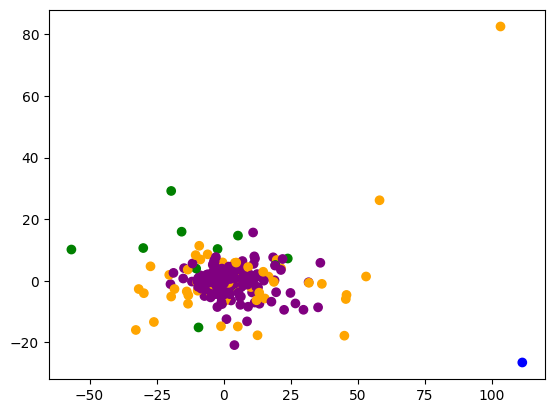

In [31]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(x[:, 3], x[:, 19], color=colr)

In [32]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

np.float64(0.6159788780344918)

In [33]:
#改为2时的结果
km = KMeans(n_clusters=2)
km.fit(x)  #开始训练
predict = km.predict(x)
print(silhouette_score(x, predict))
predict

0.7008965142255096


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
# 通过分类后数据，去看原始样本的特点
cross.iloc[0]

aisle
air fresheners candles           0
asian foods                      0
baby accessories                 0
baby bath body care              0
baby food formula                0
                                ..
trash bags liners                0
vitamins supplements             0
water seltzer sparkling water    0
white wines                      0
yogurt                           1
Name: 1, Length: 134, dtype: int64

In [35]:
predict[26]
cross.iloc[26]

aisle
air fresheners candles             0
asian foods                        4
baby accessories                   0
baby bath body care                0
baby food formula                  0
                                ... 
trash bags liners                  0
vitamins supplements               0
water seltzer sparkling water     92
white wines                        0
yogurt                           150
Name: 27, Length: 134, dtype: int64

In [36]:
#改为3时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

np.float64(0.6446000143615416)

# 四种异常值检测的方法

## 1.基于分位数找异常值

In [37]:
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 1)  # 2维数据
X

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

In [38]:
X.shape

(50, 1)

In [39]:
X[0,0]=3
X[1,0]=2

In [40]:
import pandas as pd

# 假设df是一个Pandas DataFrame，包含了你想要分析的数据集
# 'column_name'是你想要检测异常值的列名

#随机一个dataframe
df=pd.DataFrame(X,columns=['column_name'])

# 设置分位数，例如四分位数
Q1 = df['column_name'].quantile(0.25)  # 第一四分位数（25%）
Q3 = df['column_name'].quantile(0.75)  # 第三四分位数（75%）

# 计算四分位数范围（IQR）
IQR = Q3 - Q1

# 定义下界和上界来识别异常值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 标记异常值
df['outlier'] = df['column_name'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

# 打印出被标记为异常值的行
df[df['outlier'] == 'Yes']

column_name outlier
0          3.0     Yes
1          2.0     Yes

## 3.基于DBSCAN算法找异常值

(1500, 2)
--------------------------------------------------
(1600, 2)
--------------------------------------------------


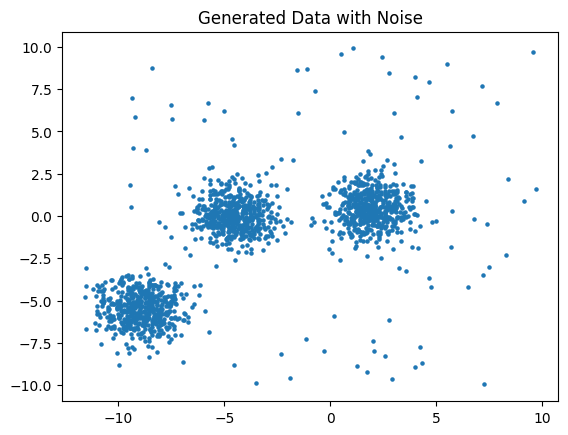

In [48]:
# 导入必要的库
from sklearn.cluster import DBSCAN   # 导入DBSCAN聚类算法
import numpy as np                   # 导入NumPy库，用于数值计算
import matplotlib.pyplot as plt       # 导入Matplotlib库，用于数据可视化
from sklearn.datasets import make_blobs  # 导入make_blobs，用于生成样本数据

# 生成样本数据
n_samples = 1500  # 设置样本数据的数量
random_state = 170  # 设置随机种子，使得每次生成的数据一致

# 使用make_blobs生成样本数据，生成1500个数据点，数据的标签y没有用，因为我们要使用DBSCAN进行无监督学习
X, y = make_blobs(n_samples=n_samples, random_state=random_state) 

# 输出生成的数据X的形状，应该是(1500, 2)，表示有1500个样本，每个样本有2个特征
print(X.shape) 
print('-'*50)

# 增加一些噪声点，模拟数据中可能出现的异常值
rng = np.random.RandomState(74)  # 设置随机数生成器的种子，确保每次生成的噪声点一致
# 生成100个噪声点，这些噪声点的特征值在[-10, 10]的范围内，数据维度为2
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))])

# 输出更新后的数据X的形状，应该是(1600, 2)，表示1600个样本，2个特征
print(X.shape)  # 1600个样本，2列特征，100个噪声点
print('-'*50)

# 可视化生成的数据，使用散点图展示数据
plt.scatter(X[:, 0], X[:, 1], s=5)  # X[:, 0]是所有样本的第一个特征（横坐标），X[:, 1]是第二个特征（纵坐标），s=5表示点的大小
plt.title("Generated Data with Noise")  # 设置图表标题
plt.show()  # 显示散点图


In [49]:
X[0:5]

array([[ -5.19811282,   0.64186932],
       [ -5.75229538,   0.41862711],
       [-10.84489837,  -7.55352273],
       [ -4.57098483,  -0.80101741],
       [ -3.51916215,   0.0393449 ]])

[-1  0  1  2]
[False False  True False False]
131
[0 1 2]


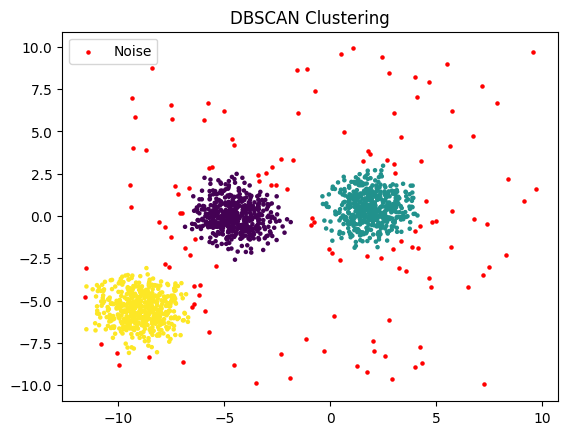

In [51]:

# 使用DBSCAN算法进行聚类
db = DBSCAN(eps=0.5, min_samples=5).fit(X)  # 训练DBSCAN聚类模型
# - eps：是两点被认为是邻居的最大距离（半径）。若两点之间的距离小于eps，则认为它们是邻居。
# - min_samples：是核心点的最小邻居数。若某个点周围有至少min_samples个点，则认为该点是一个核心点。
# DBSCAN会根据这些参数把数据分为不同的簇，以及噪声点（标签为-1）。

# 获取DBSCAN模型的聚类标签
labels = db.labels_  # labels_ 是DBSCAN训练完成后的属性，表示每个样本的类别标签

# 输出所有类别标签
print(np.unique(labels))  # np.unique(labels) 输出标签的唯一值，例如[-1, 0, 1, 2]，其中-1表示噪声点

# 标签为-1的点是噪声点，接下来找出噪声点的掩码
noise_mask = (labels == -1)  # 创建一个布尔数组，标签为-1的位置表示噪声点，其他位置为False
print(noise_mask[0:5])  # 输出噪声点掩码的前5个值，用于查看噪声点的位置
print(np.sum(noise_mask))  # 计算噪声点的数量，np.sum()返回布尔数组中True的个数（即噪声点的数量）

# 输出非噪声点的类别标签（即核心点和边界点的类别）
print(np.unique(labels[~noise_mask]))  # ~noise_mask 是取反，表示非噪声点的标签

# 可视化聚类结果
# 首先，将非噪声点（核心点和边界点）可视化，并根据类别标签着色
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], s=5, cmap='viridis')  
# X[~noise_mask, 0] 是所有非噪声点的第一个特征（横坐标），X[~noise_mask, 1] 是第二个特征（纵坐标）
# c=labels[~noise_mask] 表示为每个非噪声点指定颜色，根据其类别来着色
# s=5 设置散点的大小，cmap='viridis' 使用 'viridis' 颜色图来显示不同类别的颜色

# 然后，将噪声点用红色标注并绘制
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=5, label='Noise')  
# X[noise_mask, 0] 是所有噪声点的第一个特征，X[noise_mask, 1] 是第二个特征
# c='red' 设置噪声点的颜色为红色，s=5 设置噪声点的大小，label='Noise' 用于图例标注

# 设置图表标题和图例
plt.title("DBSCAN Clustering")  # 设置图表标题
plt.legend()  # 显示图例，用于标识噪声点

# 显示聚类结果的散点图
plt.show()  # 使用plt.show()显示图表

[ 0.00105308  0.10055646  0.05361504  0.05024246  0.07184847  0.00404901
  0.01997561  0.0627385   0.10884232  0.0783621   0.0611147   0.08402063
  0.04548452  0.07878843  0.00254178  0.08008609  0.0508405  -0.01082588
  0.06452119  0.0800867   0.04634851  0.04934762  0.06599273  0.10829868
  0.07446152 -0.01120788 -0.05423651  0.00130106  0.02542394  0.00763327
  0.07608262  0.04074583  0.09872945  0.05188861 -0.00947773  0.0588507
  0.01964547  0.0595183   0.00608521  0.06445908  0.03844004  0.03177732
  0.09384891  0.09728622  0.01367941  0.04172716  0.09544099  0.09193243
  0.06956676 -0.02362362]
[-1  1]


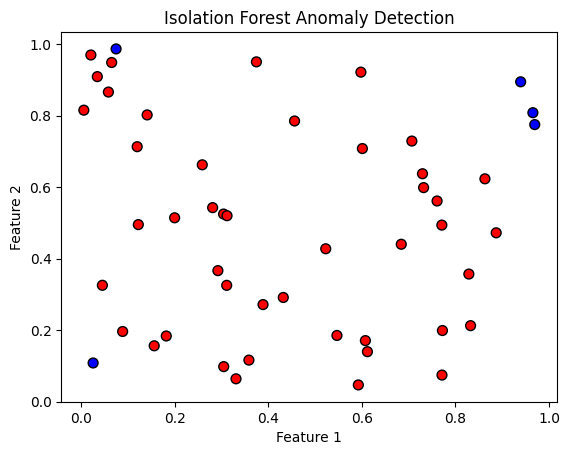

In [53]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 初始化Isolation Forest模型，contamination参数表示异常值比例，默认0.1，random_state参数表示随机种子,因为要设置随机分割点
iso_forest = IsolationForest(random_state=42, contamination=0.1)

# 训练模型，随机建树的过程
iso_forest.fit(X)

# 预测每个点的异常分数，在树中的高度越低，越可能是异常点
scores = iso_forest.decision_function(X)

print(scores)
# 将异常分数转换为1（正常）和-1（异常）的标签
labels = iso_forest.predict(X)
print(np.unique(labels))
# 绘制数据点和异常点
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.bwr, edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [54]:
#把scores和labels拼接到一起
# np.c_ 是一个用于按列连接数组的工具。它将 X（一个 50x2 的数组）、scores（一个长度为 50 的数组）和 labels（一个长度为 50 的数组）按列拼接在一起。
df=pd.DataFrame(np.c_[X,scores,labels],columns=['Feature 1','Feature 2','scores','labels'])
df

Feature 1  Feature 2    scores  labels
0    0.374540   0.950714  0.001053     1.0
1    0.731994   0.598658  0.100556     1.0
2    0.156019   0.155995  0.053615     1.0
3    0.058084   0.866176  0.050242     1.0
4    0.601115   0.708073  0.071848     1.0
5    0.020584   0.969910  0.004049     1.0
6    0.832443   0.212339  0.019976     1.0
7    0.181825   0.183405  0.062738     1.0
8    0.304242   0.524756  0.108842     1.0
9    0.431945   0.291229  0.078362     1.0
10   0.611853   0.139494  0.061115     1.0
11   0.292145   0.366362  0.084021     1.0
12   0.456070   0.785176  0.045485     1.0
13   0.199674   0.514234  0.078788     1.0
14   0.592415   0.046450  0.002542     1.0
15   0.607545   0.170524  0.080086     1.0
16   0.065052   0.948886  0.050840     1.0
17   0.965632   0.808397 -0.010826    -1.0
18   0.304614   0.097672  0.064521     1.0
19   0.684233   0.440152  0.080087     1.0
20   0.122038   0.495177  0.046349     1.0
21   0.034389   0.909320  0.049348     1.0
22   0.258780   0.662522  0.065993     1.0
23   0.311711   0.520068  0.108299     1.0
24   0.546710   0.184854  0.074462     1.0
25   0.969585   0.775133 -0.011208    -1.0
26   0.939499   0.894827 -0.054237    -1.0
27   0.597900   0.921874  0.001301     1.0
28   0.088493   0.195983  0.025424     1.0
29   0.045227   0.325330  0.007633     1.0
30   0.388677   0.271349  0.076083     1.0
31   0.828738   0.356753  0.040746     1.0
32   0.280935   0.542696  0.098729     1.0
33   0.140924   0.802197  0.051889     1.0
34   0.074551   0.986887 -0.009478    -1.0
35   0.772245   0.198716  0.058851     1.0
36   0.005522   0.815461  0.019645     1.0
37   0.706857   0.729007  0.059518     1.0
38   0.771270   0.074045  0.006085     1.0
39   0.358466   0.115869  0.064459     1.0
40   0.863103   0.623298  0.038440     1.0
41   0.330898   0.063558  0.031777     1.0
42   0.310982   0.325183  0.093849     1.0
43   0.729606   0.637557  0.097286     1.0
44   0.887213   0.472215  0.013679     1.0
45   0.119594   0.713245  0.041727     1.0
46   0.760785   0.561277  0.095441     1.0
47   0.770967   0.493796  0.091932     1.0
48   0.522733   0.427541  0.069567     1.0
49   0.025419   0.107891 -0.023624    -1.0

In [55]:
labels[labels==-1]

array([-1, -1, -1, -1, -1])